In [2]:
from IPython.display import Image

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from prettytable import PrettyTable
from tqdm import tqdm
from torchsummary import summary

import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [31]:
import PIL
from PIL import Image
import random

In [11]:
PIL2Tensor = transforms.Compose([transforms.ToTensor()])

train_loader = torch.utils.data.DataLoader(datasets.STL10('/content/drive/MyDrive/DL/MajorProject', split = 'train', transform = PIL2Tensor),
                                           shuffle=True, batch_size = 64)
test_loader = torch.utils.data.DataLoader(datasets.STL10('/content/drive/MyDrive/DL/MajorProject', split = 'test', transform = PIL2Tensor),
                                           shuffle=True, batch_size = 64)

In [120]:
Transformer = transforms.Compose([Augment(0.5), transforms.ToTensor()])

train_loader_a = torch.utils.data.DataLoader(datasets.STL10('/content/drive/MyDrive/DL/MajorProject', split = 'train', transform = Transformer),
                                           shuffle=True, batch_size = 64)
test_loader_a = torch.utils.data.DataLoader(datasets.STL10('/content/drive/MyDrive/DL/MajorProject', split = 'test', transform = Transformer),
                                           shuffle=True, batch_size = 64)

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:853: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "


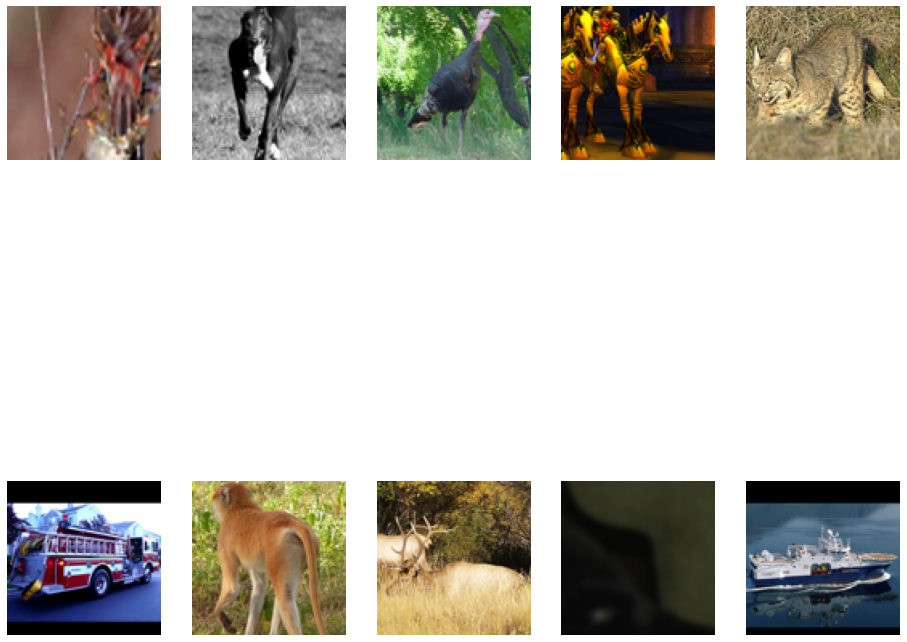

In [109]:
plt.figure(figsize=(16,16))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    image, _ = train_loader_a.dataset.__getitem__(i)
    plt.imshow(image.permute(1, 2, 0))
    plt.axis('off')

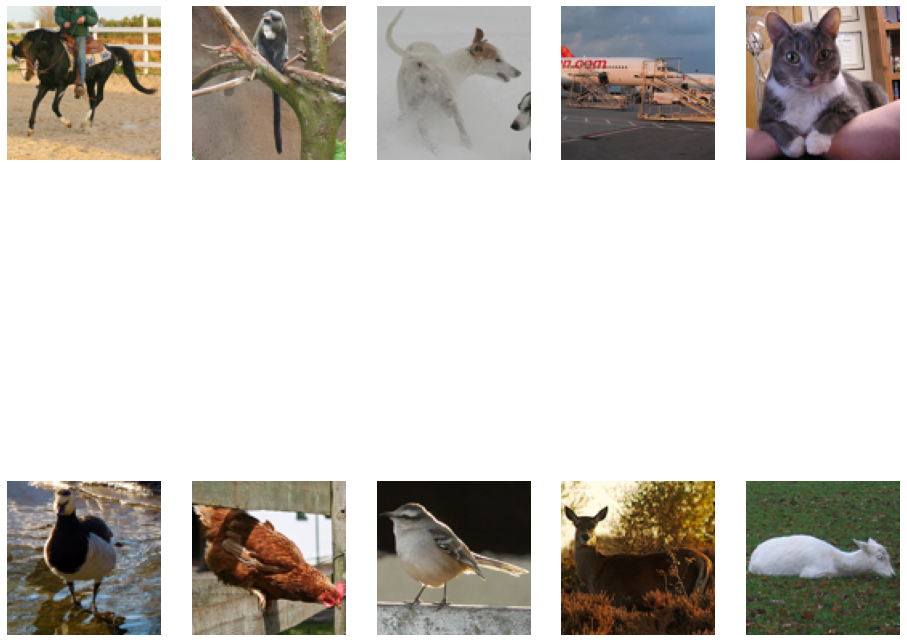

In [110]:
plt.figure(figsize=(16,16))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    image, _ = test_loader.dataset.__getitem__(i)
    plt.imshow(image.permute(1, 2, 0))
    plt.axis('off')

In [ ]:
image.size

<function Tensor.size>

In [ ]:
# class CNN(nn.Module):
#     def __init__(self):
#         super(CNN, self).__init__()

# m1out = model1.fc.in_features
# model1.fc = nn.Linear(m1out, 10)

In [ ]:
acc_list = {}

In [ ]:
def train(dataloader, epochs, model, optim, loss_f):

    model.train()

    for epoch in range(epochs):

        for batch_idx, (data, target) in enumerate(dataloader):

            data, target = data.to(device), target.to(device)
            optim.zero_grad()
            output = model(data)
            loss = loss_f(output, target)
            loss.backward()
            optim.step()
            if batch_idx % 2500 == 0:
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    epoch, batch_idx * len(data), len(dataloader.dataset),
                    100. * batch_idx / len(dataloader), loss.item()))
                
def test(dataloader, model):
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in dataloader:

        data, target = data.to(device), target.to(device)
        output = model(data)
        test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss                                                               
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability                                                                 
        correct += pred.eq(target.data.view_as(pred)).cpu().sum().item()

    test_loss /= len(dataloader.dataset)
    accuracy = 100. * correct / len(dataloader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(dataloader.dataset),
        accuracy))
    
    return accuracy

In [ ]:
model1 = models.resnet18()
# m1out = model1.fc.in_features
# Linear(in_features=512, out_features=1000
model1.fc = nn.Sequential(
    nn.Linear(512, 64),
    nn.ReLU(),
    nn.Linear(64, 10)
    )

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
 
        self.conv = nn.Sequential(              #96*96*3
            nn.Conv2d(
                in_channels=3,
                out_channels=12,
                kernel_size=8,
                stride=2
            ),                                  #45*45*12
            nn.ReLU(),
            nn.MaxPool2d(2, stride = 1),                    #44*44*12
            nn.Conv2d(
                in_channels=12,
                out_channels=12,
                kernel_size=5
            ),                                  #40*40*12
            nn.ReLU(),
            nn.MaxPool2d(2, stride = 2),        #20*20*12
            nn.Conv2d(
                in_channels=12,
                out_channels=16,
                kernel_size=5,
            ),                                  #8*8*16
            nn.ReLU(),
            nn.MaxPool2d(2),                    #8*8*16
        )
        self.mlp = nn.Sequential(
            nn.Linear(1024, 256),
            nn.ReLU(),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )
 
    def forward(self, x, verbose=False):
        x = self.conv(x)      
        # print(x.shape)  
        x = x.view(-1, 16*8*8)
        x = self.mlp(x)         
 
        return F.log_softmax(x)

In [ ]:
model1

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
class Residual(nn.Module):  
    """The Residual block of ResNet."""
    def __init__(self, input_channels, num_channels,
                 use_1x1conv=False, strides=1):
        super().__init__()
        self.conv1 = nn.Conv2d(input_channels, num_channels,
                               kernel_size=3, padding=1, stride=strides)
        self.conv2 = nn.Conv2d(num_channels, num_channels,
                               kernel_size=3, padding=1)
        if use_1x1conv:
            self.conv3 = nn.Conv2d(input_channels, num_channels,
                                   kernel_size=1, stride=strides)
        else:
            self.conv3 = None
        self.bn1 = nn.BatchNorm2d(num_channels)
        self.bn2 = nn.BatchNorm2d(num_channels)

    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = self.bn2(self.conv2(Y))
        if self.conv3:
            X = self.conv3(X)
        Y += X
        return F.relu(Y)

In [ ]:
# model1 = CNN()
model1.to(device)
optim1 = torch.optim.SGD(model1.parameters(), lr=0.01, momentum=0.5)
# count_parameters(model1)
train(train_loader, 2, model1, optim1)
acc = test(test_loader, model1)
acc_list["CNN Image"] = acc

Train Epoch: 0 [0/5000 (0%)]	Loss: -0.301647
Train Epoch: 0 [2500/5000 (50%)]	Loss: nan


KeyboardInterrupt: ignored

In [ ]:
acc = test(test_loader, model1)


Test set: Average loss: nan, Accuracy: 800/8000 (10%)



In [119]:
torch.save(model1, '/content/drive/MyDrive/DL/MajorProject/model_step1_60_a1.pth')

###STEP 2


In [ ]:
del(unlabeled_loader)

###STEP 5

In [ ]:
unlabeledtrain_loader = torch.utils.data.DataLoader(datasets.STL10('/content/drive/MyDrive/DL/MajorProject', split = 'train+unlabeled', 
                                                              transform = PIL2Tensor), shuffle=True)

In [ ]:
unlabeledtrain_loader.dataset[0][1]

1

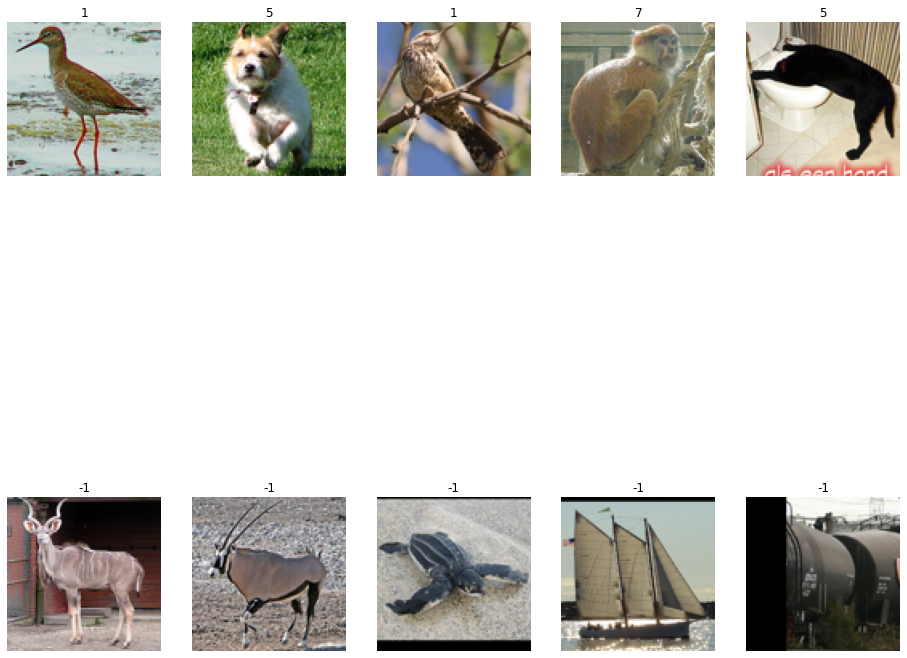

In [ ]:
plt.figure(figsize=(16,16))
for i in range(4995, 5005):
    
    image, target = unlabeledtrain_loader.dataset.__getitem__(i)
    plt.subplot(2, 5, i + 1 -4995).title.set_text(target)
    plt.imshow(image.permute(1, 2, 0))
    plt.axis('off')

In [ ]:
image, target = unlabeledtrain_loader.dataset.__getitem__(4999)

In [ ]:
unlabeledtrain_loader.dataset.__getitem__(5999)[0].shape

torch.Size([3, 96, 96])

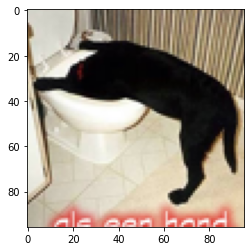

In [ ]:
plt.imshow(image.permute(1, 2, 0))

In [ ]:
model1.eval()

CNN(
  (conv): Sequential(
    (0): Conv2d(3, 12, kernel_size=(8, 8), stride=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(12, 12, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(12, 16, kernel_size=(5, 5), stride=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (mlp): Sequential(
    (0): Linear(in_features=1024, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

0it [00:00, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
9it [00:00, 31.01it/s]


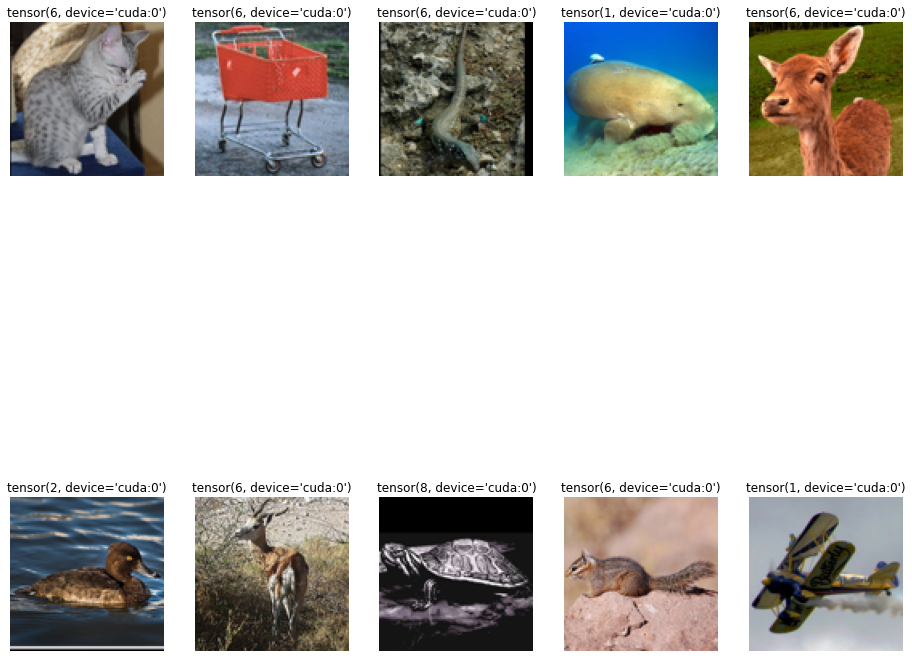

In [ ]:
i = 1
plt.figure(figsize = (16,16))
for batch_idx, (data, target) in tqdm(enumerate(unlabeledtrain_loader)):
  data, target = data.to(device), target.to(device)
  output = model1(data)
  num = torch.argmax(output)
  plt.subplot(2, 5, i).title.set_text(num)
  img = data[0].to(torch.device('cpu'))
  plt.imshow(img.permute(1, 2, 0))
  plt.axis('off')
  # print(num)
  if(i == 10):
    break
  i+=1
  # if num != 0:
  #   # plt.figure().title.set_text(num)
  #   plt.imshow(data[0].permute(1, 2, 0))
  #   plt.axis('off')
    

In [ ]:
data.shape
# plt.imshow(data)

torch.Size([1, 3, 96, 96])

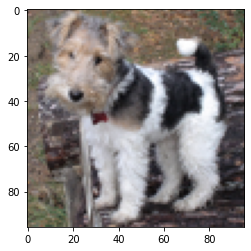

In [ ]:
# unlabeledtrain_loader.dataset[5999][0]
plt.imshow(unlabeledtrain_loader.dataset[5999][0].permute(1, 2, 0))

In [113]:
def train(dataloader, epochs, model, optim, loss_f):

    model.train()

    for epoch in range(epochs):

        for batch_idx, (data, target) in enumerate(dataloader):

            data, target = data.to(device), target.to(device)
            optim.zero_grad()
            output = model(data)
            loss = loss_f(output, target)
            loss.backward()
            optim.step()
            if batch_idx % 50 == 0:
                print(f"Train Epoch: {epoch} [{batch_idx * len(data)}/{len(dataloader.dataset)} {100. * batch_idx / len(dataloader)}%)]\tLoss: {loss.item()}
                      ,val_acc {test(test_loader_a,model)}")
                
def test(dataloader, model):
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in dataloader:

        data, target = data.to(device), target.to(device)
        output = model(data)
        test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss                                                               
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability                                                                 
        correct += pred.eq(target.data.view_as(pred)).cpu().sum().item()

    test_loss /= len(dataloader.dataset)
    accuracy = 100. * correct / len(dataloader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(dataloader.dataset),
        accuracy))
    
    return accuracy

In [5]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(nn.Module):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 64,pool=True)
        self.conv2 = conv_block(64, 128, pool=True) # output: 128 x 24 x 24
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))
        
        self.conv3 = conv_block(128, 256, pool=True) # output: 256 x 12 x 12
        self.conv4 = conv_block(256, 512, pool=True) # output: 512 x 6 x 6
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))
        
        self.classifier = nn.Sequential(nn.MaxPool2d(6), 
                                        nn.Flatten(), 
                                        nn.Dropout(0.2),
                                        nn.Linear(512, num_classes))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

In [114]:
model1 = ResNet9(3,10).to(device)
optim1 = torch.optim.Adam(model1.parameters(), lr = 0.001)
loss = torch.nn.CrossEntropyLoss()


# train(train_loader, 30, model1, optim1, loss)
# acc = test(test_loader, model1)
# # acc_list["CNN Image"] = acc

In [121]:
train(train_loader_a, 5, model1, optim1, loss)


Test set: Average loss: -3.4768, Accuracy: 4228/8000 (53%)

Train Epoch: 0 [0/5000 0.0%)]	Loss: 2.9665920734405518,val_acc 52.85

Test set: Average loss: -4.1843, Accuracy: 4895/8000 (61%)

Train Epoch: 0 [3200/5000 63.29113924050633%)]	Loss: 0.6549162268638611,val_acc 61.1875

Test set: Average loss: -4.7371, Accuracy: 4751/8000 (59%)

Train Epoch: 1 [0/5000 0.0%)]	Loss: 0.5366402864456177,val_acc 59.3875

Test set: Average loss: -4.7797, Accuracy: 4867/8000 (61%)

Train Epoch: 1 [3200/5000 63.29113924050633%)]	Loss: 0.5476574897766113,val_acc 60.8375

Test set: Average loss: -4.9616, Accuracy: 4607/8000 (58%)

Train Epoch: 2 [0/5000 0.0%)]	Loss: 0.6797880530357361,val_acc 57.5875

Test set: Average loss: -4.8341, Accuracy: 4952/8000 (62%)

Train Epoch: 2 [3200/5000 63.29113924050633%)]	Loss: 0.8803239464759827,val_acc 61.9

Test set: Average loss: -4.8953, Accuracy: 4911/8000 (61%)

Train Epoch: 3 [0/5000 0.0%)]	Loss: 0.4804180860519409,val_acc 61.3875

Test set: Average loss: -4.88

In [107]:
class Augment:
    def __init__(self, prob):
        self.prob = prob
        self.transform = transforms.Compose([
            transforms.RandomResizedCrop(96, interpolation=Image.BICUBIC),
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.RandomApply(
                [transforms.ColorJitter(brightness=0.4, contrast=0.4,
                                        saturation=0.2, hue=0.1)],
                p=0.8
            ),
            transforms.RandomGrayscale(p=0.2),
            GaussianBlur(p=0.2),
            Solarization(p=0.1),
        ])

    def __call__(self, x):
        if random.random() > self.prob:
            return x
        x = self.transform(x)
        return x


class debuger(object):
    def __call__(self, img):
        print(type(img))
        return img

class GaussianBlur(object):
    def __init__(self, p):
        self.p = p

    def __call__(self, img):
        if random.random() < self.p:
            sigma = random.random() * 1.9 + 0.1
            return img.filter(PIL.ImageFilter.GaussianBlur(sigma))
        else:
            return img


class Solarization(object):
    def __init__(self, p):
        self.p = p

    def __call__(self, img):
        if random.random() < self.p:
            return PIL.ImageOps.solarize(img)
        else:
            return img

